In [1]:
import os, sys
sys.path.append('../src/')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.naive_bayes import GaussianNB

# https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#trend-indicators
import ta

import indicators as ind
import arena as arn
import stockmarket as smkt

In [2]:
stock_data = pd.read_excel('../data/indicadores petrobras.xlsx')
stock_data.index = stock_data['Data'].values
stock_data = stock_data.sort_index()
stock_data

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume
2016-01-26,2016-01-26,4.20,4.20,-4.76,4.23,4.12,4.31,302717532
2016-01-27,2016-01-27,4.57,4.57,8.81,4.22,4.16,4.64,352368579
2016-01-28,2016-01-28,4.60,4.60,0.66,4.67,4.35,5.13,618332894
2016-01-29,2016-01-29,4.84,4.84,5.22,4.70,4.52,4.86,439826229
2016-02-01,2016-02-01,4.72,4.72,-2.48,4.74,4.66,4.86,245882432
...,...,...,...,...,...,...,...,...
2021-05-20,2021-05-20,25.93,25.93,-0.84,26.15,25.72,26.28,"1,84B"
2021-05-21,2021-05-21,25.95,25.95,0.08,26.08,25.94,26.31,"2,12B"
2021-05-24,2021-05-24,26.39,26.39,1.70,26.28,25.99,26.52,"1,65B"
2021-05-25,2021-05-25,25.84,25.84,-2.08,26.48,25.78,26.62,"1,65B"


In [3]:
# Calculating the stock market indicators:
stock_data = ind.stock_preprocessing(stock_data)
stock_data

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume,macd,signal,histogram,williams_r
2016-01-26,2016-01-26,4.20,4.20,-4.76,4.23,4.12,4.31,302717532,NaN,NaN,NaN,NaN
2016-01-27,2016-01-27,4.57,4.57,8.81,4.22,4.16,4.64,352368579,NaN,NaN,NaN,NaN
2016-01-28,2016-01-28,4.60,4.60,0.66,4.67,4.35,5.13,618332894,NaN,NaN,NaN,NaN
2016-01-29,2016-01-29,4.84,4.84,5.22,4.70,4.52,4.86,439826229,NaN,NaN,NaN,NaN
2016-02-01,2016-02-01,4.72,4.72,-2.48,4.74,4.66,4.86,245882432,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,2021-05-20,25.93,25.93,-0.84,26.15,25.72,26.28,"1,84B",0.752362,0.556300,0.196063,-22.193878
2021-05-21,2021-05-21,25.95,25.95,0.08,26.08,25.94,26.31,"2,12B",0.742583,0.593556,0.149027,-21.683673
2021-05-24,2021-05-24,26.39,26.39,1.70,26.28,25.99,26.52,"1,65B",0.761559,0.627157,0.134402,-11.141304
2021-05-25,2021-05-25,25.84,25.84,-2.08,26.48,25.78,26.62,"1,65B",0.723873,0.646500,0.077373,-28.235294


In [4]:
stock_data.columns

Index(['Data', 'Histórico', 'Fech.', 'Var.Dia (%)', 'Abertura', 'Mínimo',
       'Máximo', 'Volume', 'macd', 'signal', 'histogram', 'williams_r'],
      dtype='object')

# Data Preparation:

In [5]:
FEATURES_NAMES = ['macd', 'signal', 'histogram', 'williams_r']

In [6]:
data_train = stock_data[0:501].dropna()
data_train

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume,macd,signal,histogram,williams_r
2016-03-15,2016-03-15,6.61,6.61,-10.6800,6.61,6.56,6.96,698485643,0.784765,0.712257,0.072509,-46.938776
2016-03-16,2016-03-16,7.23,7.23,9.3800,6.51,6.41,7.23,584312229,0.757236,0.721253,0.035983,-29.203540
2016-03-17,2016-03-17,8.10,8.10,12.0300,8.15,7.71,8.19,943356446,0.796439,0.736290,0.060149,-3.703704
2016-03-18,2016-03-18,8.12,8.12,0.2500,8.09,7.72,8.17,608847049,0.819674,0.752967,0.066707,-3.205128
2016-03-21,2016-03-21,8.06,8.06,-0.7400,8.08,7.93,8.27,526247185,0.823750,0.767123,0.056627,-6.730769
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-24,2018-01-24,19.34,19.34,5.7400,18.42,18.42,19.63,1707747172,0.733523,0.563741,0.169782,-9.477124
2018-01-26,2018-01-26,19.12,19.12,0.0307,18.82,18.32,19.17,"81,99M",0.770849,0.605163,0.165687,-17.465753
2018-01-29,2018-01-29,19.04,19.04,-0.0042,18.87,18.77,19.23,"55,73M",0.784927,0.641115,0.143811,-20.629371
2018-01-30,2018-01-30,18.70,18.70,-0.0179,18.97,18.57,18.97,"46,20M",0.759889,0.664870,0.095019,-32.517483


In [7]:
data_test = stock_data[501:]
data_test

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume,macd,signal,histogram,williams_r
2018-02-01,2018-02-01,19.69,19.69,0.0418,18.96,18.96,19.78,"51,95M",0.792414,0.703610,0.088803,-3.260870
2018-02-02,2018-02-02,19.16,19.16,-0.0269,19.47,19.04,19.59,"50,66M",0.776240,0.718136,0.058104,-23.574144
2018-02-05,2018-02-05,18.27,18.27,-0.0465,18.85,18.27,19.16,"62,27M",0.683726,0.711254,-0.027528,-60.887097
2018-02-06,2018-02-06,19.18,19.18,0.0498,17.90,17.86,19.18,"74,15M",0.676044,0.704212,-0.028168,-30.456853
2018-02-07,2018-02-07,18.65,18.65,-0.0276,19.16,18.57,19.40,"61,91M",0.620042,0.687378,-0.067336,-58.854167
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,2021-05-20,25.93,25.93,-0.8400,26.15,25.72,26.28,"1,84B",0.752362,0.556300,0.196063,-22.193878
2021-05-21,2021-05-21,25.95,25.95,0.0800,26.08,25.94,26.31,"2,12B",0.742583,0.593556,0.149027,-21.683673
2021-05-24,2021-05-24,26.39,26.39,1.7000,26.28,25.99,26.52,"1,65B",0.761559,0.627157,0.134402,-11.141304
2021-05-25,2021-05-25,25.84,25.84,-2.0800,26.48,25.78,26.62,"1,65B",0.723873,0.646500,0.077373,-28.235294


In [8]:
X_train = data_train[FEATURES_NAMES]
X_train

,macd,signal,histogram,williams_r
2016-03-15,0.784765,0.712257,0.072509,-46.938776
2016-03-16,0.757236,0.721253,0.035983,-29.203540
2016-03-17,0.796439,0.736290,0.060149,-3.703704
2016-03-18,0.819674,0.752967,0.066707,-3.205128
2016-03-21,0.823750,0.767123,0.056627,-6.730769
...,...,...,...,...
2018-01-24,0.733523,0.563741,0.169782,-9.477124
2018-01-26,0.770849,0.605163,0.165687,-17.465753
2018-01-29,0.784927,0.641115,0.143811,-20.629371
2018-01-30,0.759889,0.664870,0.095019,-32.517483


In [9]:
y_train = np.random.choice([0, 1, 2], data_train.shape[0])
y_train

array([0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,

In [10]:
X_test = data_test[FEATURES_NAMES]
X_test

,macd,signal,histogram,williams_r
2018-02-01,0.792414,0.703610,0.088803,-3.260870
2018-02-02,0.776240,0.718136,0.058104,-23.574144
2018-02-05,0.683726,0.711254,-0.027528,-60.887097
2018-02-06,0.676044,0.704212,-0.028168,-30.456853
2018-02-07,0.620042,0.687378,-0.067336,-58.854167
...,...,...,...,...
2021-05-20,0.752362,0.556300,0.196063,-22.193878
2021-05-21,0.742583,0.593556,0.149027,-21.683673
2021-05-24,0.761559,0.627157,0.134402,-11.141304
2021-05-25,0.723873,0.646500,0.077373,-28.235294


# Training the gaussian model:

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
gnb.predict(X_train)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
gnb.predict_proba(X_train)

array([[0.37862612, 0.37422264, 0.24715124],
       [0.38087971, 0.38194678, 0.2371735 ],
       [0.42951775, 0.35625952, 0.21422273],
       ...,
       [0.41777821, 0.34332204, 0.23889975],
       [0.38662708, 0.36628999, 0.24708293],
       [0.38501294, 0.3725219 , 0.24246515]])

# Operating in the market:

In [14]:
# Train data:
mkt_op = smkt.MarkerOperator(gnb, FEATURES_NAMES, initial_cash=data_train['Fech.'].values[0]*100, daily_negotiable_perc=0.5)
op_results = mkt_op.run(data_train)
op_results

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume,macd,signal,histogram,williams_r,op,cash,n_stocks,wealth,baseline_wealth
2016-03-15,2016-03-15,6.61,6.61,-10.6800,6.61,6.56,6.96,698485643,0.784765,0.712257,0.072509,-46.938776,0.0,661.00,0.0,661.00,661.0
2016-03-16,2016-03-16,7.23,7.23,9.3800,6.51,6.41,7.23,584312229,0.757236,0.721253,0.035983,-29.203540,1.0,661.00,0.0,661.00,723.0
2016-03-17,2016-03-17,8.10,8.10,12.0300,8.15,7.71,8.19,943356446,0.796439,0.736290,0.060149,-3.703704,0.0,335.65,45.0,700.15,810.0
2016-03-18,2016-03-18,8.12,8.12,0.2500,8.09,7.72,8.17,608847049,0.819674,0.752967,0.066707,-3.205128,0.0,335.65,45.0,701.05,812.0
2016-03-21,2016-03-21,8.06,8.06,-0.7400,8.08,7.93,8.27,526247185,0.823750,0.767123,0.056627,-6.730769,0.0,335.65,45.0,698.35,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-26,2018-01-26,19.12,19.12,0.0307,18.82,18.32,19.17,"81,99M",0.770849,0.605163,0.165687,-17.465753,0.0,785.18,3.0,842.54,1912.0
2018-01-29,2018-01-29,19.04,19.04,-0.0042,18.87,18.77,19.23,"55,73M",0.784927,0.641115,0.143811,-20.629371,0.0,785.18,3.0,842.30,1904.0
2018-01-30,2018-01-30,18.70,18.70,-0.0179,18.97,18.57,18.97,"46,20M",0.759889,0.664870,0.095019,-32.517483,0.0,785.18,3.0,841.28,1870.0
2018-01-31,2018-01-31,18.90,18.90,0.0107,18.94,18.88,19.12,"41,58M",0.747567,0.681409,0.066157,-26.164875,0.0,785.18,3.0,841.88,1890.0


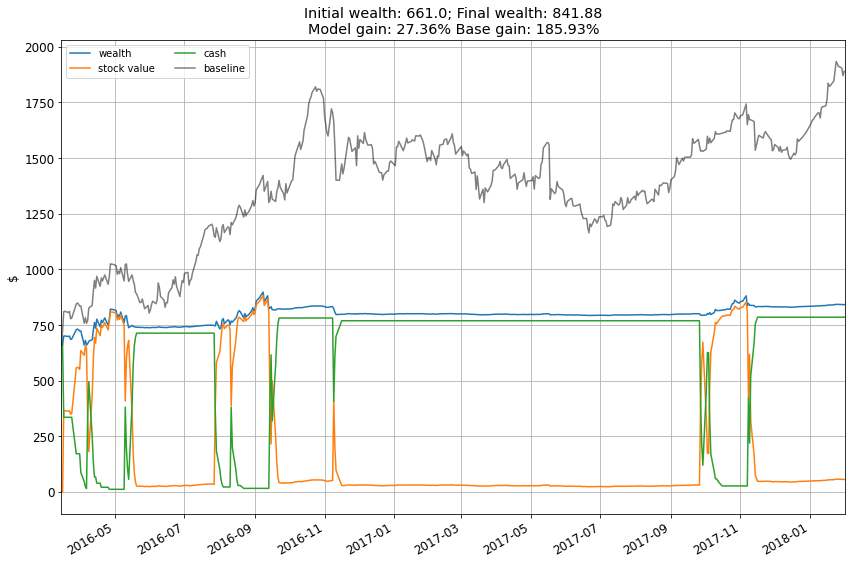

In [15]:
mkt_op.plot_wealth(grad_threshold=10)

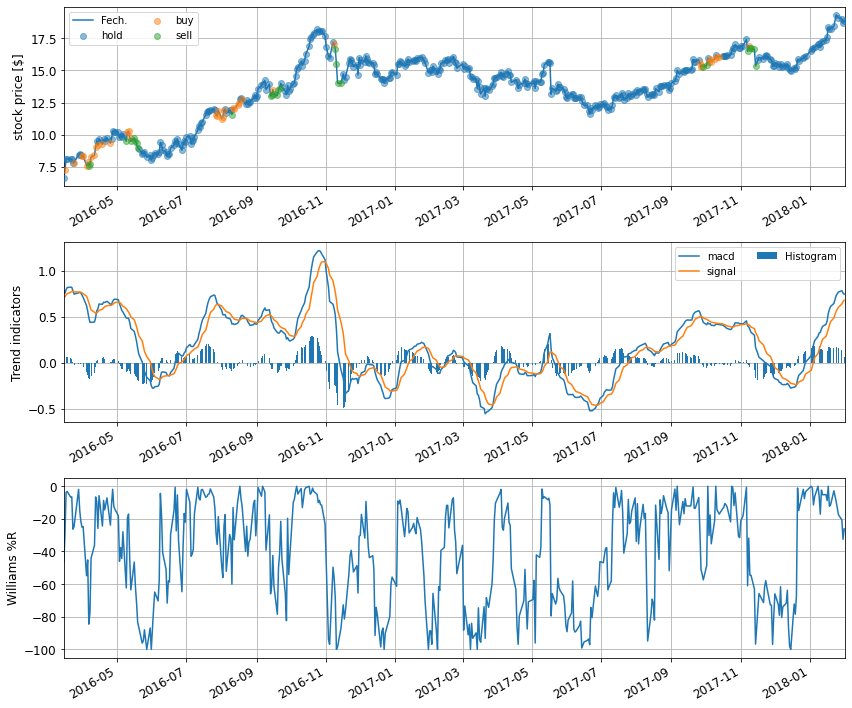

In [16]:
mkt_op.plot_operations()

In [17]:
# Test data:
mkt_op.initial_cash = data_test['Fech.'].values[0]*100
op_results_test = mkt_op.run(data_test)
op_results_test

,Data,Histórico,Fech.,Var.Dia (%),Abertura,Mínimo,Máximo,Volume,macd,signal,histogram,williams_r,op,cash,n_stocks,wealth,baseline_wealth
2018-02-01,2018-02-01,19.69,19.69,0.0418,18.96,18.96,19.78,"51,95M",0.792414,0.703610,0.088803,-3.260870,0.0,1969.00,0.0,1969.00,1969.0
2018-02-02,2018-02-02,19.16,19.16,-0.0269,19.47,19.04,19.59,"50,66M",0.776240,0.718136,0.058104,-23.574144,0.0,1969.00,0.0,1969.00,1916.0
2018-02-05,2018-02-05,18.27,18.27,-0.0465,18.85,18.27,19.16,"62,27M",0.683726,0.711254,-0.027528,-60.887097,1.0,1969.00,0.0,1969.00,1827.0
2018-02-06,2018-02-06,19.18,19.18,0.0498,17.90,17.86,19.18,"74,15M",0.676044,0.704212,-0.028168,-30.456853,1.0,1000.69,53.0,2017.23,1918.0
2018-02-07,2018-02-07,18.65,18.65,-0.0276,19.16,18.57,19.40,"61,91M",0.620042,0.687378,-0.067336,-58.854167,1.0,502.01,79.0,1975.36,1865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-21,2021-05-21,25.95,25.95,0.0800,26.08,25.94,26.31,"2,12B",0.742583,0.593556,0.149027,-21.683673,0.0,1713.25,3.0,1791.10,2595.0
2021-05-24,2021-05-24,26.39,26.39,1.7000,26.28,25.99,26.52,"1,65B",0.761559,0.627157,0.134402,-11.141304,0.0,1713.25,3.0,1792.42,2639.0
2021-05-25,2021-05-25,25.84,25.84,-2.0800,26.48,25.78,26.62,"1,65B",0.723873,0.646500,0.077373,-28.235294,0.0,1713.25,3.0,1790.77,2584.0
2021-05-26,2021-05-26,26.09,26.09,0.9700,25.91,25.65,26.17,"1,13B",0.706040,0.658408,0.047632,-21.257485,0.0,1713.25,3.0,1791.52,2609.0


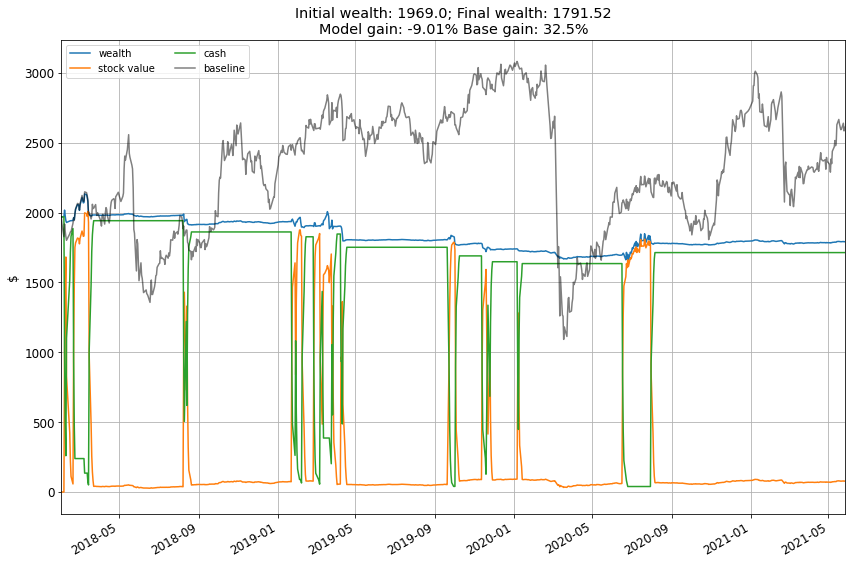

In [18]:
mkt_op.plot_wealth()

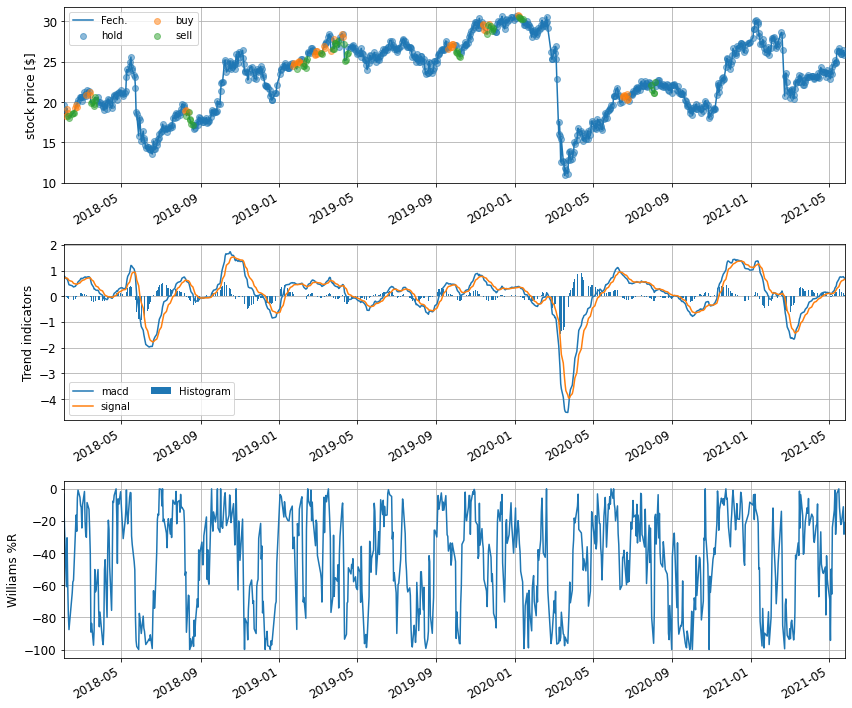

In [19]:
mkt_op.plot_operations()